In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.17.2
pandas 0.25.3
sklearn 0.21.3
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
house = fetch_california_housing()
print(house.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
house.data.shape, house.target.shape

((20640, 8), (20640,))

In [4]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    house.data, house.target, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state=11)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_valid.shape, y_valid.shape)

(11610, 8) (11610,)
(5160, 8) (5160,)
(3870, 8) (3870,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)


In [6]:
# 手动实现学习率的超参数搜索
learning_rate = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]

histories = []
for lr in learning_rate:
    model = keras.Sequential([
        keras.layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]),
        keras.layers.Dense(1)
    ])
    optimizer = keras.optimizers.SGD(lr)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    history = model.fit(x_train_scaled, y_train,
                        validation_data=(x_valid_scaled, y_valid),
                        epochs=100,
                        callbacks=[keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)])
    histories.append(history)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 146us/sample - loss: 3.2746 - val_loss: 2.8671
Epoch 2/100
11610/11610 [==============================] - 1s 75us/sample - loss: 2.3121 - val_loss: 2.1214
Epoch 3/100
11610/11610 [==============================] - 1s 97us/sample - loss: 1.7312 - val_loss: 1.6637
Epoch 4/100
11610/11610 [==============================] - 1s 76us/sample - loss: 1.3769 - val_loss: 1.3786
Epoch 5/100
11610/11610 [==============================] - 1s 76us/sample - loss: 1.1573 - val_loss: 1.1986
Epoch 6/100
11610/11610 [==============================] - 1s 77us/sample - loss: 1.0202 - val_loss: 1.0830
Epoch 7/100
11610/11610 [==============================] - 1s 78us/sample - loss: 0.9328 - val_loss: 1.0064
Epoch 8/100
11610/11610 [==============================] - 1s 82us/sample - loss: 0.8755 - val_loss: 0.9543
Epoch 9/100
11610/11610 [==============================] - 1s 106us/sample - loss: 0.8

11610/11610 [==============================] - 1s 71us/sample - loss: 0.4663 - val_loss: 0.4989
Epoch 22/100
11610/11610 [==============================] - 1s 72us/sample - loss: 0.4628 - val_loss: 0.4954
Epoch 23/100
11610/11610 [==============================] - 1s 73us/sample - loss: 0.4593 - val_loss: 0.4930
Epoch 24/100
11610/11610 [==============================] - 1s 74us/sample - loss: 0.4560 - val_loss: 0.4873
Epoch 25/100
11610/11610 [==============================] - 1s 73us/sample - loss: 0.4531 - val_loss: 0.4838
Epoch 26/100
11610/11610 [==============================] - 1s 74us/sample - loss: 0.4502 - val_loss: 0.4810
Epoch 27/100
11610/11610 [==============================] - 1s 74us/sample - loss: 0.4476 - val_loss: 0.4784
Epoch 28/100
11610/11610 [==============================] - 1s 73us/sample - loss: 0.4450 - val_loss: 0.4754
Epoch 29/100
11610/11610 [==============================] - 1s 74us/sample - loss: 0.4427 - val_loss: 0.4731
Epoch 30/100
11610/11610 [======

11610/11610 [==============================] - 1s 72us/sample - loss: nan - val_loss: nan
Epoch 3/100
11610/11610 [==============================] - 1s 72us/sample - loss: nan - val_loss: nan
Epoch 4/100
11610/11610 [==============================] - 1s 73us/sample - loss: nan - val_loss: nan
Epoch 5/100
11610/11610 [==============================] - 1s 73us/sample - loss: nan - val_loss: nan
Epoch 6/100
11610/11610 [==============================] - 1s 71us/sample - loss: nan - val_loss: nan


Learning rate:  0.0001


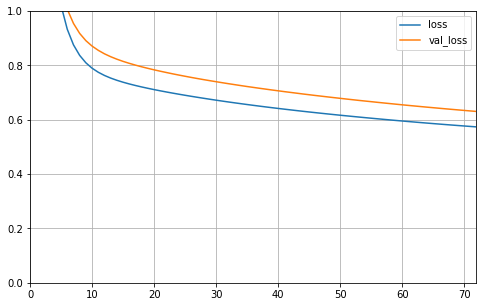

Learning rate:  0.0003


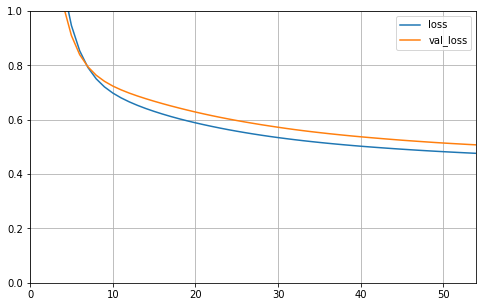

Learning rate:  0.001


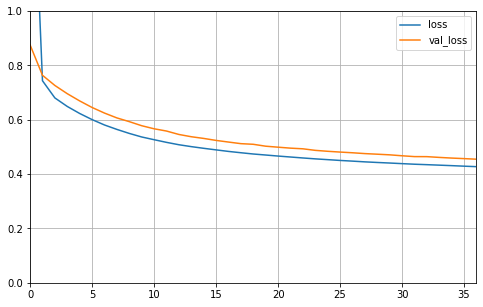

Learning rate:  0.003


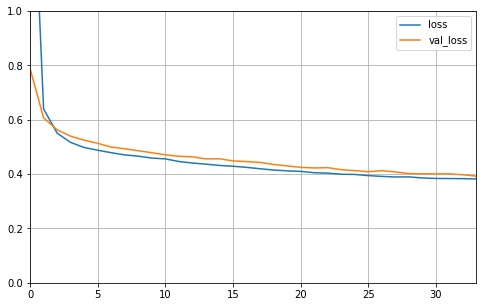

Learning rate:  0.01


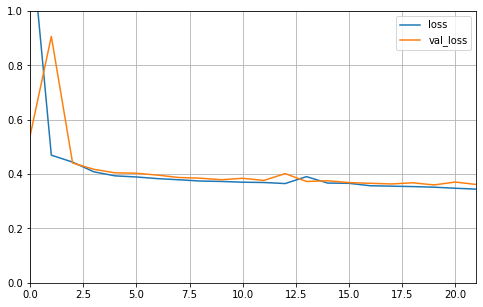

Learning rate:  0.03


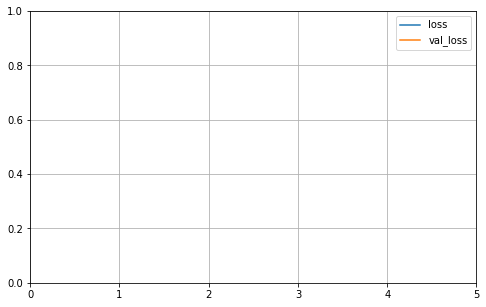

In [7]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
for lr, history in zip(learning_rate, histories):
    print('Learning rate: ', lr)
    plot_learning_curves(history)